<a href="https://colab.research.google.com/github/BinBinToure/Python/blob/main/%EB%B9%84%ED%8A%B8_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%88%98%EC%A7%91_%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94_05_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from  matplotlib import pyplot as plt

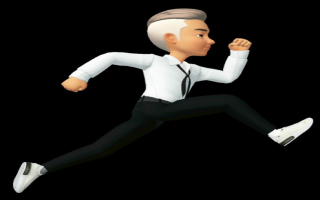

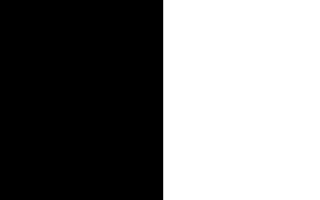

In [2]:
# 이미지 연산 기초
path1 = '/content/drive/MyDrive/eh.jpg'
path2 = '/content/drive/MyDrive/black_white.png'
img1 = cv2.imread(path1, cv2.IMREAD_COLOR)
img2 = cv2.imread(path2, cv2.IMREAD_COLOR)

# 이미지 크기 조절
img1 = cv2.resize(img1, dsize=(320,200),interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2, dsize=(320,200),interpolation=cv2.INTER_AREA)
cv2_imshow(img1)
cv2_imshow(img2)

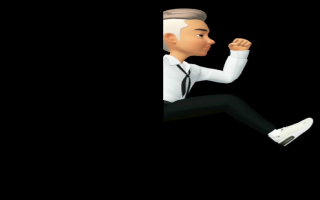

(16, 0, 0)

In [3]:
#AND
and_img = cv2.bitwise_and(img1,img2)
cv2_imshow(and_img)
img1[160,70,0], img2[160,70,0],and_img[160,70,0]

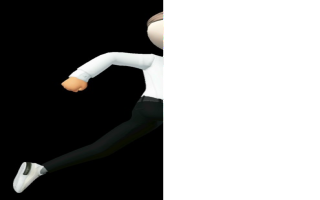

[[19 19 19]]


In [4]:
#OR
or_img = cv2.bitwise_or(img1,img2)
cv2_imshow(or_img)
ar1 = np.array([[0x12,0x12,0x12]])
ar2 = np.array([[0x3,0x3,0x3]])
print(cv2.bitwise_or(ar1,ar2))

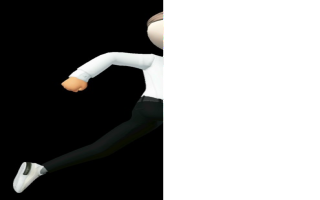

[[17 17 17]]


In [5]:
#xor
xor_img = cv2.bitwise_or(img1,img2)
cv2_imshow(xor_img)
ar1 = np.array([[0x12,0x12,0x12]])
ar2 = np.array([[0x3,0x3,0x3]])
print(cv2.bitwise_xor(ar1,ar2))

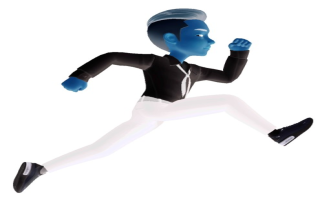

[[-19 -19 -19]]


In [6]:
# not
not_img = cv2.bitwise_not(img1)
cv2_imshow(not_img)
ar1 = np.array([[0x12,0x12,0x12]])
print(cv2.bitwise_not(ar1))

# 색조(Hue)

0 ~ 360, 0 : RED, 120 : GREEN, 240 : BLUE

opencv에서는 Hue/2값으로 설정(0~179까지 사용)

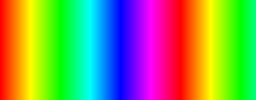

In [9]:
img = np.zeros((100,256,3),np.uint8)
for i in range(256) :
  img[:,i,0] = i # 색조는 i로 표현 
img[:,:,1] = 255 # 채도는 MAX로 표현
img[:,:,2] = 255 # Value는 MAX로 표현
img = cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

# 채도(Saturation)
0 ~ 1 사이의 값

OpenCV에서는 0에서 255값으로 매핑


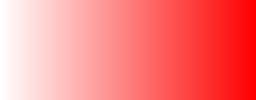

In [11]:
img = np.zeros((100,256,3),np.uint8)
for i in range(256) :
  img[:,i,1] = i # 채도는 i로 표현 
img[:,:,0] = 0 # 색조는 0(RED)
img[:,:,2] = 255 # Value는 MAX로 표현
img = cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

# Value

OpenCV에서는 0에서 255값으로 매핑

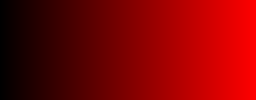

In [12]:
img = np.zeros((100,256,3),np.uint8)
for i in range(256) :
  img[:,i,2] = i # VALUE는 i로 표현 
img[:,:,0] = 0   # 색조는 0(RED)
img[:,:,1] = 255 # 채도는 MAX로 표현
img = cv2.cvtColor(img,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

색상곤간 변형한 후에 원하는 영역 추출해보기

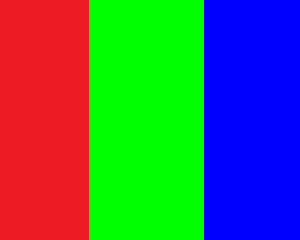

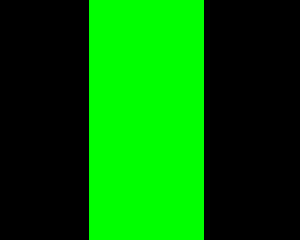

In [17]:
path = '/content/drive/MyDrive/rgb.png'
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.resize(img,dsize=(300,240))
cv2_imshow(img)

# STEP1 - 색상 공간을 HSV로 변형한다.
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h_green = cv2.inRange(hsv, (59,0,0),(61,255,255))
d_green = cv2.bitwise_and(img,img,mask=h_green)
cv2_imshow(d_green)

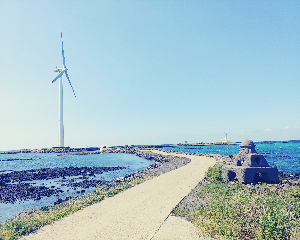

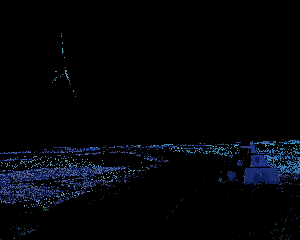

In [20]:
path = '/content/drive/MyDrive/sinchang.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.resize(img,dsize=(300,240))


# STEP1 = 색상 공간 변형
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# STEP2 = 원하는 영역 Filter
h_filter = cv2.inRange(hsv,(90,100,0), (140,255,190))
d_img = cv2.bitwise_and(img,img,mask=h_filter)
cv2_imshow(img)
cv2_imshow(d_img)

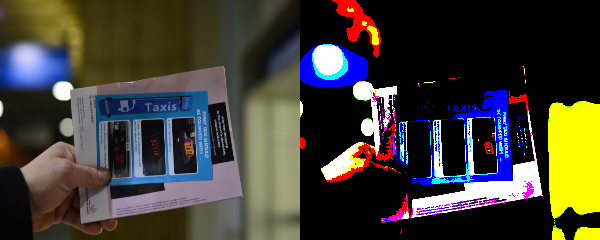

In [23]:
path = '/content/drive/MyDrive/ticket.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.resize(img,dsize=(300,240))

# 이진화
# cv.threshold( src, thresh, maxval, type[, dst] )
_,th_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # 이진화
mimg = cv2.hconcat([img,th_img])
cv2_imshow(mimg)

이미지 처리 기초

In [ ]:
path = '/content/drive/MyDrive/sinchang.jpg'
src_img = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_img)

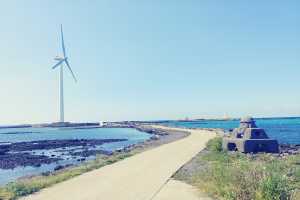

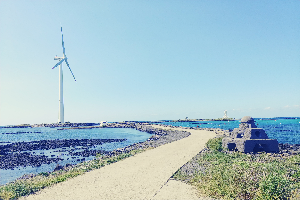

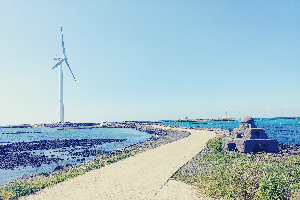

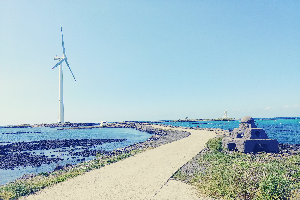

In [31]:
# 크기 조절
dst_img1 = cv2.resize(src_img, dsize=(300,200),interpolation=cv2.INTER_AREA)
cv2_imshow(dst_img1)

# 선형보간법 2X2
dst_img2 = cv2.resize(src_img, dsize=(300,200),interpolation=cv2.INTER_LINEAR)
cv2_imshow(dst_img2)

# 선형보간법 4X4
dst_img3 = cv2.resize(src_img, dsize=(300,200),interpolation=cv2.INTER_CUBIC)
cv2_imshow(dst_img3)

# 선형보간법 8X8
dst_img4 = cv2.resize(src_img, dsize=(300,200),interpolation=cv2.INTER_LANCZOS4)
cv2_imshow(dst_img4)

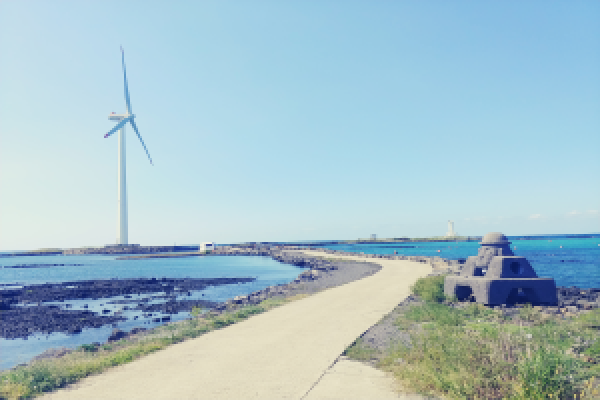

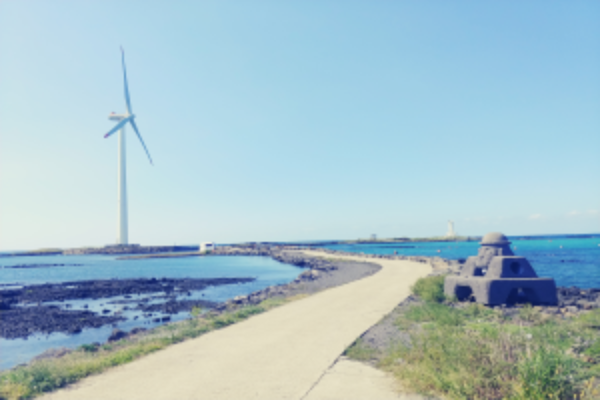

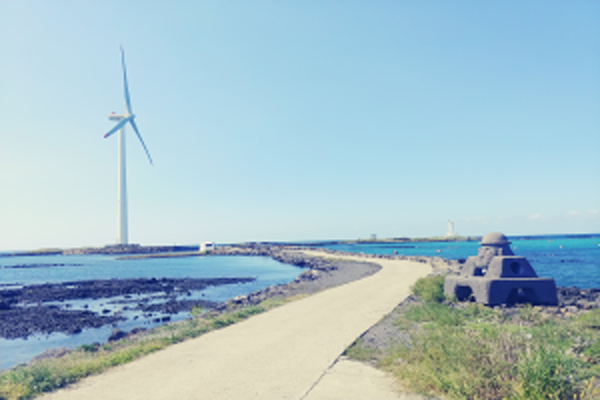

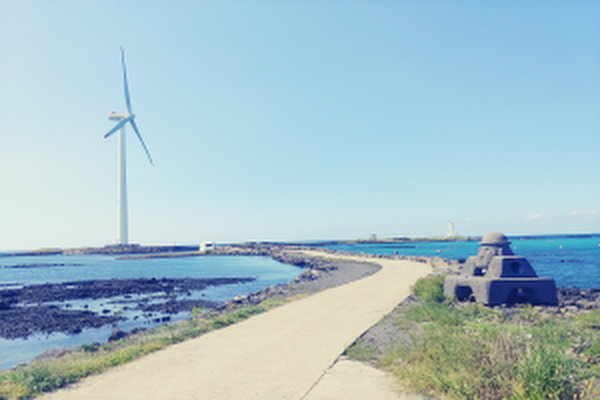

In [32]:
# 크기 조절
dst_img5 = cv2.resize(dst_img1, dsize=(600,400),interpolation=cv2.INTER_AREA)
cv2_imshow(dst_img5)

# 선형보간법 2X2
dst_img6 = cv2.resize(dst_img1, dsize=(600,400),interpolation=cv2.INTER_LINEAR) # 확대할 때 사용
cv2_imshow(dst_img6)

# 선형보간법 4X4
dst_img7 = cv2.resize(dst_img1, dsize=(600,400),interpolation=cv2.INTER_CUBIC)  # 확대할 때 사용
cv2_imshow(dst_img7)

# 선형보간법 8X8
dst_img8 = cv2.resize(dst_img1, dsize=(600,400),interpolation=cv2.INTER_LANCZOS4)  # 확대할 때 사용
cv2_imshow(dst_img8)

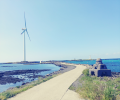

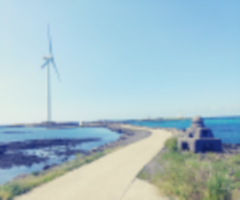

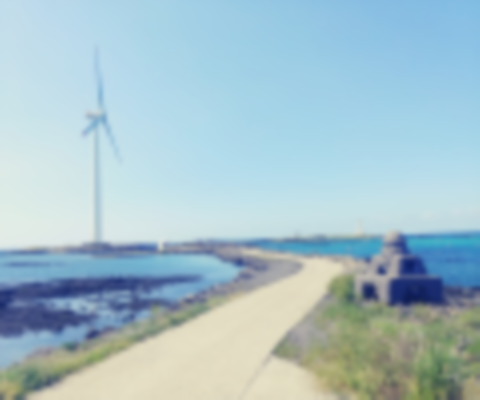

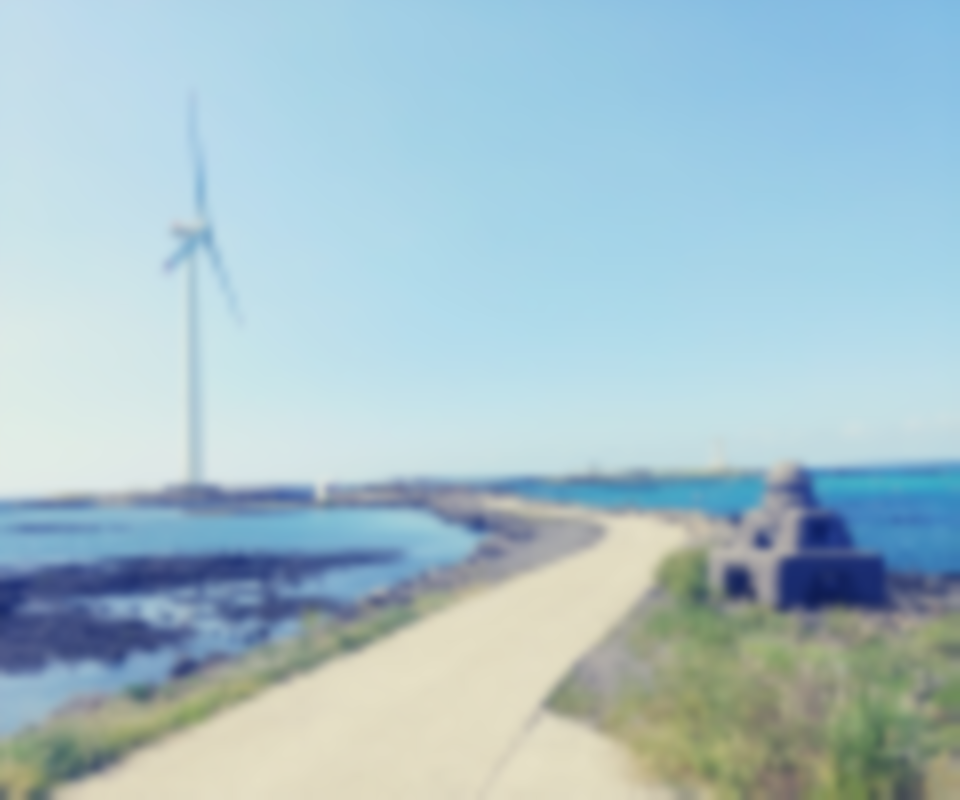

In [37]:
# 피라미드 확대
# cv.pyrUP (   src[, dst[ dstsize[ , borderType]]]  )
dst_img1 = cv2.resize(src_img, dsize=(120,100), interpolation=cv2.INTER_AREA) 
cv2_imshow(dst_img1)

u_image = cv2.pyrUp(dst_img1)
cv2_imshow(u_image)

u_image = cv2.pyrUp(u_image)
cv2_imshow(u_image)

u_image = cv2.pyrUp(u_image)
cv2_imshow(u_image)

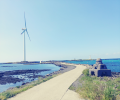

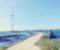

In [38]:
dst_img1 = cv2.resize(src_img, dsize=(120,100), interpolation=cv2.INTER_AREA) 
cv2_imshow(dst_img1)

u_image = cv2.pyrDown(dst_img1)
cv2_imshow(u_image)

u_image = cv2.pyrDown(u_image)
cv2_imshow(u_image)

u_image = cv2.pyrDown(u_image)
cv2_imshow(u_image)

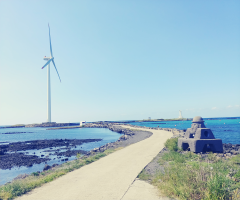

In [39]:
# 이미지 대칭
dst_img = cv2.resize(src_img, dsize=(240,200), interpolation=cv2.INTER_AREA)
cv2_imshow(dst_img)


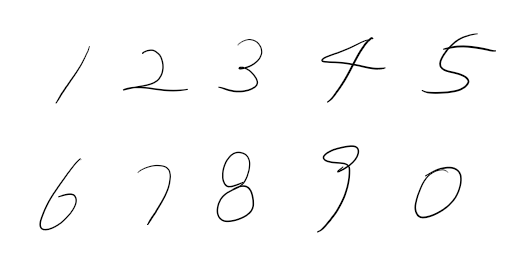

In [40]:
path = '/content/drive/MyDrive/Number.png'
img = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(img)

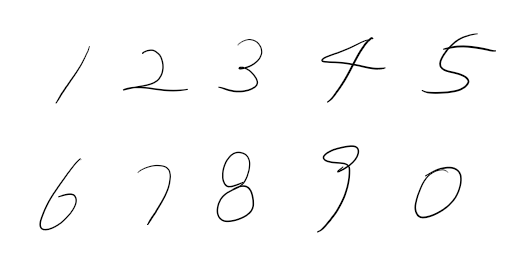

In [41]:
#step1 원본 이미지를 복사
cpy_img = img.copy()
cv2_imshow(cpy_img)

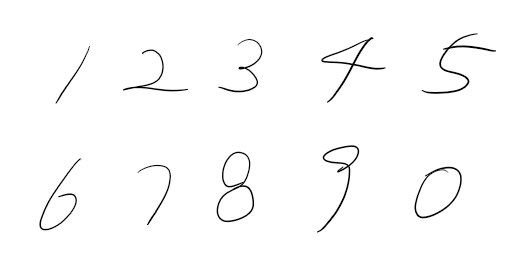

In [42]:
# step2 흑백 이미지로 색상 공간 변환
gray_img = cv2.cvtColor(cpy_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [43]:
# 칼라 이미지와 흑백 이미지 구조 비교
print(cpy_img.shape, gray_img.shape)

(259, 532, 3) (259, 532)
